In [49]:
import matplotlib.pyplot as plt
import tensorflow as tf
(train_images, train_labels),(test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [50]:
print(train_images.shape)

(60000, 28, 28)


In [51]:
print(train_labels.shape)

(60000,)


In [52]:
test_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [53]:
test_labels[0]

np.uint8(7)

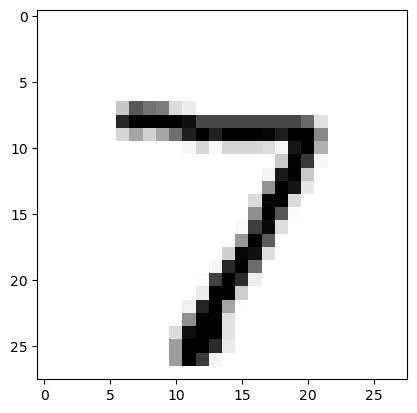

In [54]:
plt.imshow(test_images[0], cmap="Greys")

In [55]:
model = tf.keras.models.Sequential([], name="MNIST")

In [56]:
model.add(tf.keras.layers.Input(shape=(28*28,)))
model.add(tf.keras.layers.Dense(units=512, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

In [57]:
train_images = train_images.reshape(60000, 28*28)
train_images = train_images / 255.0

In [58]:
print(train_images[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [59]:
test_images = test_images.reshape(10000, 28*28)
test_images = test_images / 255.0

In [60]:
print(test_labels[1])

2


In [61]:
test_labels = tf.keras.utils.to_categorical(test_labels)

In [62]:
print(test_labels[1])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [63]:
train_labels = tf.keras.utils.to_categorical(train_labels)

In [64]:
print(train_labels[1])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [65]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [66]:
model.summary()

Model: "MNIST"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [67]:
model.fit(x=train_images, y=train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9343 - loss: 0.2229
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9743 - loss: 0.0830
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9834 - loss: 0.0526
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9883 - loss: 0.0369
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9910 - loss: 0.0275
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9932 - loss: 0.0214
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9948 - loss: 0.0164
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9951 - loss: 0.0145
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9951 - loss: 0.0146
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9957 - loss: 0.0126


In [68]:
(test_loss, test_accuracy) = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.9804 - loss: 0.0754


In [69]:
print(test_accuracy)

0.980400025844574


In [70]:
print(test_loss)

0.07536762207746506


In [71]:
model.save("MNIST_PARAM.keras")

In [72]:
import cv2 as cv

In [73]:
image = cv.imread("./test_images/img01.jpg", cv.IMREAD_GRAYSCALE)
cv.imshow("WINDOW", image)
cv.waitKey(0)
cv.destroyAllWindows()

In [76]:
image = image.astype('float32')

In [84]:
print(image.shape)
# (90, 95) 이런 식으로 나오면 → 28x28로 바꿔야 함


(1, 784)


In [85]:
image = image.reshape(1, 28*28) # 평탄화

In [86]:
image = 255.0 - image # 이미지 반전

In [87]:
image /= 255.0 # 0.0 ~ 1.0 이미지 전처리

In [89]:
predict = model.predict(image, batch_size=1)
print(predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[1.6765949e-05 7.4539697e-10 3.4854966e-11 2.3101666e-07 7.2029681e-13
  9.9992847e-01 2.4673416e-05 2.8592606e-11 2.9077160e-05 7.0544689e-07]]


In [90]:
print(f"가장 큰 인덱스 : {predict.argmax()}")

가장 큰 인덱스 : 5


In [ ]:
history_ann = ann_model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.1)